## ex12-Bonus: interactions avec Panda

Dans les notebooks précédents, nous avons mis en pratique la syntaxe SQL de base avec sql% (SQL magic), tout comme l'utilisation d'un outil de ligne de commande. 

En fait, SQL magic a une belle intégration avec la bibliothèque pandas. 

Le résultat de la requête SQL peut être converti en trame de données pandas standard via un appel DataFrame. 

Après avoir récupéré des données dans un Pandas DataFrame, nous pouvons effectuer une analyse de données plus exploratoire. 

Cependant, c'est une autre histoire qui dépasse la portée de SQL lui-même.


In [ ]:
%load_ext sql

### 1. Load all needed libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [ ]:
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


### 2. Read the table of rch in the demo.db3

#### 2.1 Connection à la database demo.db3

In [ ]:
%sql sqlite:////content/gdrive/MyDrive/Partage/Notebooks_Serie_1/demo.db3

'Connected: @/content/gdrive/MyDrive/Partage/Notebooks_Serie_1/demo.db3'

#### 2.2 Save query into a variable

In [ ]:
%%sql sqlres << 
SELECT RCH, YR, MO, FLOW_OUTcms 
FROM rch

 * sqlite:///data/demo.db3
Done.
Returning data to local variable sqlres


#### 2.3 Retrieve dataframe from query results

In [ ]:
df = sqlres.DataFrame()
df.head()

RCH    YR  MO  FLOW_OUTcms
0    1  1981   1   146.252487
1    2  1981   1    96.182854
2    3  1981   1    11.861368
3    4  1981   1    49.406513
4    5  1981   1   272.106018

### 3. Further process with Pandas

#### 3.1 Custom quarters definition

In [ ]:
quarters = {1: 'DJF', 2: 'DJF', 3: 'MAM', 4: 'MAM', 5: 'MAM', 6: 'JJA',
            7: 'JJA', 8: 'JJA', 9: 'SON', 10: 'SON', 11: 'SON', 12: 'DJF'}

#### 3.2 Carry out seasonal statistics for each reach

In [ ]:
df = df.set_index(['MO'])
ssndf = df.groupby(['RCH',quarters])['FLOW_OUTcms'].mean()
ssndf.head(5)

RCH     
1    DJF      99.204991
     JJA    1405.262298
     MAM     559.746932
     SON     454.737985
2    DJF      56.328539
Name: FLOW_OUTcms, dtype: float64

#### Reset index

In [ ]:
ssndf = ssndf.reset_index()
ssndf.set_index(['RCH'])
ssndf.head(5)

RCH level_1  FLOW_OUTcms
0    1     DJF    99.204991
1    1     JJA  1405.262298
2    1     MAM   559.746932
3    1     SON   454.737985
4    2     DJF    56.328539

In [ ]:
ssndf = ssndf.rename(index=str, columns={"level_1":"SSN"})
ssndf.head(5)

RCH  SSN  FLOW_OUTcms
0    1  DJF    99.204991
1    1  JJA  1405.262298
2    1  MAM   559.746932
3    1  SON   454.737985
4    2  DJF    56.328539

#### Convert data into pivoted table

In [ ]:
pivoted = ssndf.pivot(index='RCH', columns='SSN', values='FLOW_OUTcms')
pivoted.head()

SSN         DJF          JJA          MAM         SON
RCH                                                  
1     99.204991  1405.262298   559.746932  454.737985
2     56.328539   773.664280   203.242828  297.934326
3     32.838328   166.310382   379.771358   27.425488
4     28.384519   619.184517   278.996801  155.766145
5    336.824441  1635.518864  1215.423962  499.265579

### 4. Visualize
Set some parameters to make figure pretty

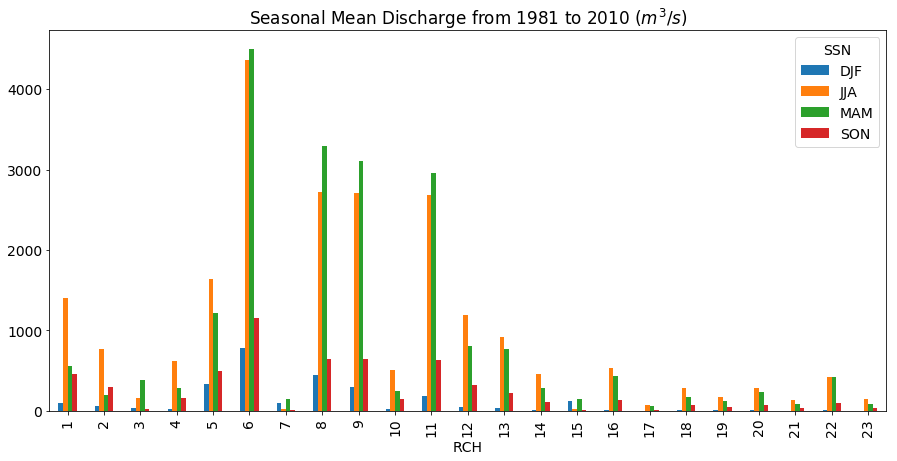

In [ ]:
# Plot size to 15" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Display top and right frame lines
matplotlib.rc('axes.spines', top = True, right = True)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

pivoted.plot(kind='bar', title='Seasonal Mean Discharge from 1981 to 2010 ($m^3/s$)')

### Summary


In this tutorial we have seen how easy it is to link a SQLite database operations to Pandas via sql%. Moreover, we use Python tools such as Pandas do more further analysis after retrieving data.